# Hopp-Woods Hydrophilicity Prediction

## Adapted from publication:

*Prediction of protein antigenic determinants from amino
acid sequences*

by

THOMAS P. HOPP AND KENNETH R. WOODS

PNAS, 1981

## Mathematical principles

Given: 

$$ A=\Bigg\{\frac{\sum\limits_{i=n}^{n+\Delta-1} X_{i}}{\Delta} \Bigg| 0\le n \le N-\Delta\Bigg\} $$

Rank items in set $A$ from high to low

where:

$N$: length of the protein 

$n$: residue index position on the protein (starting from 0)

$\Delta$: length of the peptide region of interest

$X_{i}$: Hopp-Woods hydrophilicity value of amino acid $X$ 
         at index position $i$


In [3]:
import matplotlib.pyplot as plt

# Hopp-Woods hydrophilicity scores
hopp_scores={
    "R": 3,
    "D": 3,
    "E": 3,
    "K": 3,
    "S":0.3,
    "N":0.2,
    "Q":0.2,
    "G":0,
    "P":0,
    "T":-0.4,
    "A":-0.5,
    "H":-0.5,
    "C":-1,
    "M":-1.3,
    "V":-1.5,
    "I":-1.8,
    "L":-1.8,
    "Y":-2.3,
    "F":-2.5,
    "W":-3.4
}


def calc_hopp(seq, pep_length):
    """
    
    :param seq: Amino acid sequence, in string format. Must be 1-letter code 
    :param pep_length: The desired length of peptide (i.e. number of residues to average)
    :return:    
            A list of turples: [(val_1, peptide_1), (val_2, peptide_2)]. Values refers to the 
            Hopps averaged score for the peptide. The list of is in the same order as 
            protein sequence. E.g. (val_1, peptide_1) refers to the value of peptide_1, 
            which starts with 1st amino acid in teh protein seq. (val_2, peptide_2) refers 
            to the value of peptide_2, where the 1st amino acid of peptide 2 is the 2nd amino
            acid in the protein seq. 
    
    """
    
    aa_lst=list(seq)
    resi_hopp_lst=[hopp_scores[x] for x in aa_lst]
    
    pept_score_dict={} #a dictionary of {peptide_seq: averaged_hopp_score}
    
    for i in range (0, len(resi_hopp_lst)-pep_length+1): #range of n in the formula
        pept_score=sum(resi_hopp_lst[i:i+pep_length])/pep_length  #averaged Hopp score
        pept_seq="".join(aa_lst[i:i+pep_length])
        pept_score_dict[pept_seq]=pept_score
        
    #key:value pair was switched in the turple to allow sorting by hopp score
    return [(v, k) for k, v in pept_score_dict.items()] 
    

(Avg Hopp Score Sorted, Peptide)
0.56 RCSSN
0.54 CSQNE
0.46 KGTNA
0.40 NSVKG
0.32 TNSVK
0.30 EYFDS
0.28 SQNEY
0.28 NEYFD
0.28 SVKGT
0.26 VKGTN
0.16 LRCSS
0.14 QLRCS
0.08 SSNTP
0.08 PCQLR
0.02 QRYCN
0.02 SNTPP
0.00 LTCQR
-0.02 QCSQN
-0.06 GQCSQ
-0.10 TCQRY
-0.12 RYCNA
-0.12 CSSNT
-0.12 CQLRC
-0.16 DSLLH
-0.20 AGQCS
-0.22 CQRYC
-0.22 SVTNS
-0.28 QNEYF
-0.38 NASVT
-0.38 ASVTN
-0.40 NTPPL
-0.50 CNASV
-0.52 TPPLT
-0.56 FDSLL
-0.58 VTNSV
-0.60 PLTCQ
-0.64 PPLTC
-0.66 YFDSL
-0.66 YCNAS
-0.72 CIPCQ
-0.76 HACIP
-0.86 SLLHA
-0.86 ACIPC
-0.88 IPCQL
-1.12 LLHAC
-1.12 LHACI


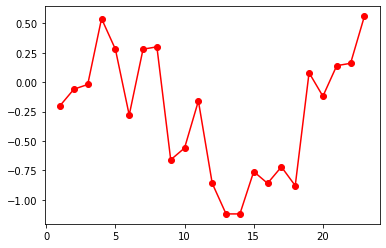

In [4]:
#provide protein seq   
protein="AGQCSQNEYFDSLLHACIPCQLRCSSNTPPLTCQRYCNASVTNSVKGTNA"

#calculate averaged Hopp scores
result=calc_hopp(protein, 5)


#print averaged Hopp score result, from lowest to highest
print("(Avg Hopp Score Sorted, Peptide)")
for i in sorted(result, reverse=True):
    print ("{:.2f}".format(i[0]), "{}".format(i[1]))
    
    
    
#desired range to show on the x axis. 
# Recommend to change starting position to 1 instead of 0
x=range(1, 24) 

#range of averaged hopp scores to show on y axis. 
y=[x[0] for x in result[0:23]]

#plot chart
plt.plot(x, y, "r-", x, y, "ro")


